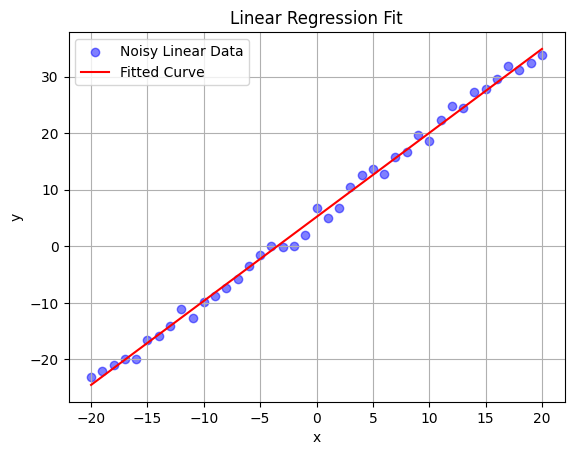

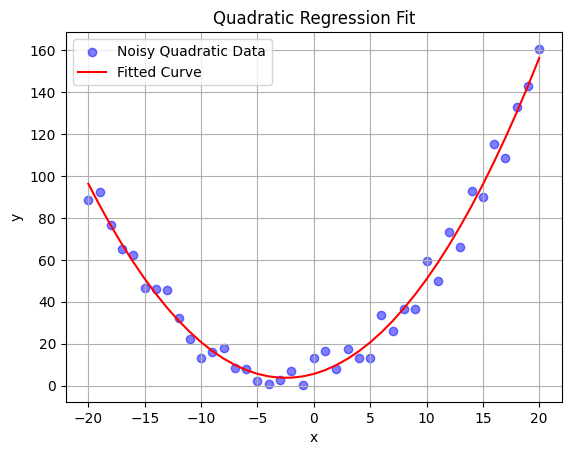

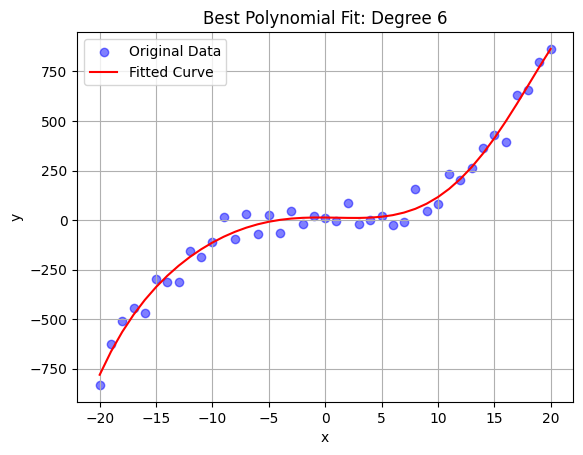

In [ ]:
#1
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

def plot_polynomial_fit(x, y, coeffs, title, label):
    plt.scatter(x, y, label=label, color='blue', alpha=0.5)
    plt.plot(x, np.polyval(coeffs, x), label='Fitted Curve', color='red')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()
x = np.arange(-20, 21, 1)
a0, a1, a2 = 5, 1.5, 0.3
noise_linear = 4 * (np.random.rand(len(x)) - 0.5)
y_linear = a0 + a1 * x + noise_linear
coeffs_linear = np.polyfit(x, y_linear, 1)
plot_polynomial_fit(x, y_linear, coeffs_linear, "Linear Regression Fit", "Noisy Linear Data")
noise_quadratic = 20 * (np.random.rand(len(x)) - 0.5)
y_quadratic = a0 + a1 * x + a2 * x**2 + noise_quadratic
coeffs_quadratic = np.polyfit(x, y_quadratic, 2)
plot_polynomial_fit(x, y_quadratic, coeffs_quadratic, "Quadratic Regression Fit", "Noisy Quadratic Data")
data = loadmat('data.mat')
x_data = data['x'].flatten()
y_data = data['y'].flatten()
error = [np.sum((np.polyval(np.polyfit(x_data, y_data, deg), x_data) - y_data) ** 2)
          for deg in range(1, 7)]
best_deg = np.argmin(error) + 1
best_coeffs = np.polyfit(x_data, y_data, best_deg)
plot_polynomial_fit(x_data, y_data, best_coeffs, f"Best Polynomial Fit: Degree {best_deg}", "Original Data")


Fitted Constants: K = 1106.53, n = 0.41


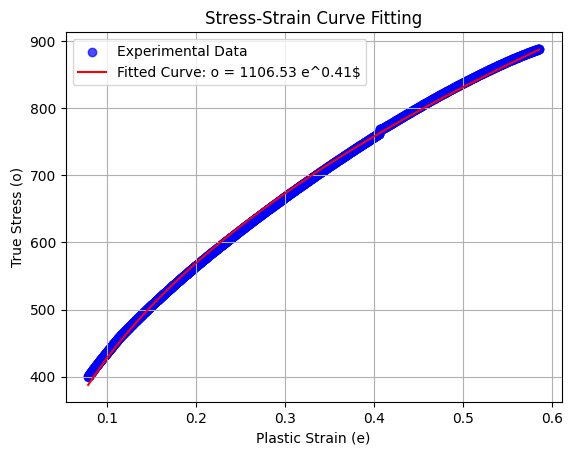

In [ ]:
#2
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
strain, stress = np.genfromtxt('stressstrain.csv', delimiter=',', unpack=True)
def stress_strain_model(e, K, eta):
    return K * e**eta
(K_fit, eta_fit), _ = curve_fit(stress_strain_model, strain, stress, p0=[100, 0.1])
print(f"Fitted Constants: K = {K_fit:.2f}, n = {eta_fit:.2f}")
strain_fit = np.linspace(strain.min(), strain.max(), 100)
stress_fit = stress_strain_model(strain_fit, K_fit, eta_fit)
plt.scatter(strain, stress, label="Experimental Data", color='blue', alpha=0.7)
plt.plot(strain_fit, stress_fit, label=f"Fitted Curve: o = {K_fit:.2f} e^{eta_fit:.2f}$", color='red')
plt.xlabel("Plastic Strain (e)")
plt.ylabel("True Stress (o)")
plt.title("Stress-Strain Curve Fitting")
plt.legend()
plt.grid(True)
plt.show()

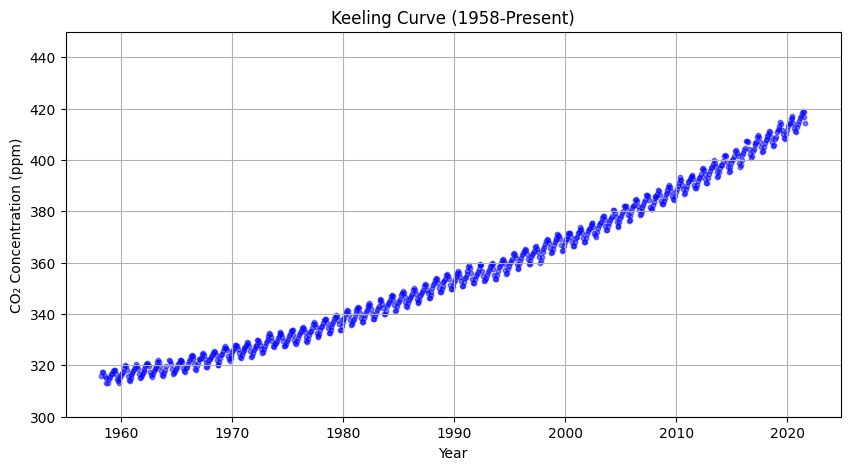

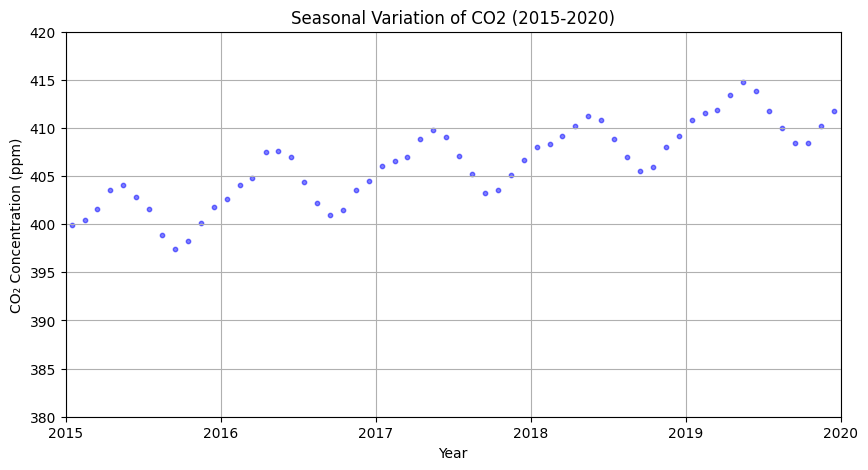

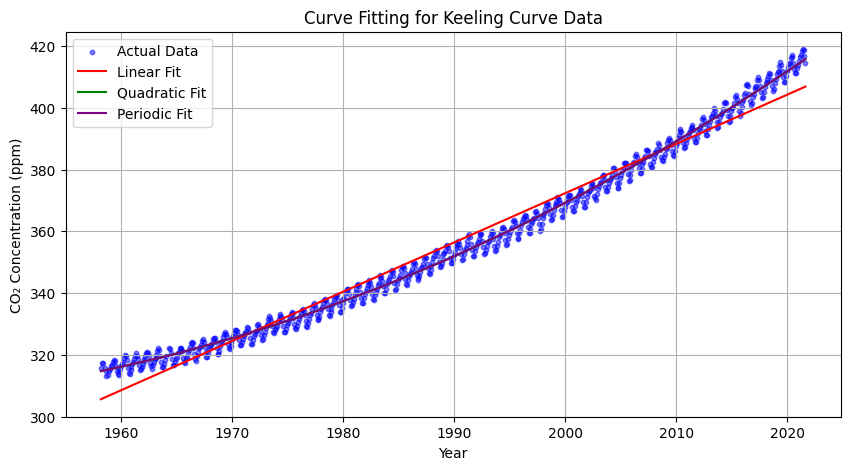


Predicted CO2 Levels (ppm) from 2023 to 2027:
2023: Linear=409.05, Quadratic=419.13, Periodic=419.18
2024: Linear=410.65, Quadratic=421.62, Periodic=421.67
2025: Linear=412.24, Quadratic=424.14, Periodic=424.16
2026: Linear=413.84, Quadratic=426.69, Periodic=426.66
2027: Linear=415.44, Quadratic=429.26, Periodic=429.22


In [ ]:
#3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
dataframe = pd.read_csv('Keeling-NH.csv', header=None)
x, y = dataframe.iloc[:, 3].values, dataframe.iloc[:, 4].values
xc, yc = x[y > 0], y[y > 0]
def linear_model(x, a0, a1):
    return a0 + a1 * x
def quadratic_model(x, a0, a1, a2):
    return a0 + a1 * x + a2 * x**2
def periodic_model(x, a0, a1, a2, a3, a4):
    return a0 + a1 * x + a2 * x**2 + a3 * np.sin(a4 - x)
popt_linear, _ = curve_fit(linear_model, xc, yc)
popt_quadratic, _ = curve_fit(quadratic_model, xc, yc)
popt_periodic, _ = curve_fit(periodic_model, xc, yc, p0=[400, 1, 0, 2, 0])
x_fit = np.linspace(xc.min(), xc.max(), 500)
y_fits = {"Linear": linear_model(x_fit, *popt_linear),
    "Quadratic": quadratic_model(x_fit, *popt_quadratic),
    "Periodic": periodic_model(x_fit, *popt_periodic)}
def plot_data(x, y, title, xlim=None, ylim=None):
    plt.figure(figsize=(10, 5))
    plt.scatter(x, y, s=10, color='blue', alpha=0.5)
    plt.xlabel("Year")
    plt.ylabel("CO₂ Concentration (ppm)")
    plt.title(title)
    if xlim:
        plt.xlim(xlim)
    if ylim:
        plt.ylim(ylim)
    plt.grid()
    plt.show()
def plot_fits(x_fit, y_fits, title):
    plt.figure(figsize=(10, 5))
    plt.scatter(xc, yc, s=10, color='blue', alpha=0.5, label="Actual Data")
    colors = ['red', 'green', 'purple']
    for i, (model_name, y_fit) in enumerate(y_fits.items()):
        plt.plot(x_fit, y_fit, label=f"{model_name} Fit", color=colors[i])
    plt.xlabel("Year")
    plt.ylabel("CO₂ Concentration (ppm)")
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()
plot_data(xc, yc, "Keeling Curve (1958-Present)", ylim=(300, 450))
plot_data(xc, yc, "Seasonal Variation of CO2 (2015-2020)", xlim=(2015, 2020), ylim=(380, 420))
plot_fits(x_fit, y_fits, "Curve Fitting for Keeling Curve Data")
future_years = np.arange(2023, 2028)
future_co2_linear = linear_model(future_years, *popt_linear)
future_co2_quadratic = quadratic_model(future_years, *popt_quadratic)
future_co2_periodic = periodic_model(future_years, *popt_periodic)
print("\nPredicted CO2 Levels (ppm) from 2023 to 2027:")
for i, year in enumerate(future_years):
    print(f"{year}: Linear={future_co2_linear[i]:.2f}, Quadratic={future_co2_quadratic[i]:.2f}, Periodic={future_co2_periodic[i]:.2f}")